In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import gridspec
import geopandas as gpd
import geobr

In [8]:

# temporal expanse of all data sets in months
T_value = 120

def get_biome_data(data):

    df = pd.read_csv(data, sep='\t')

    vec_LUT = df["vec_LUT"].to_numpy()
    vec_Prec = df["vec_Prec"].to_numpy()
    vec_Temp = df["vec_Temp"].to_numpy()
    vec_Humid = df["vec_Humid"].to_numpy()
    vec_Speed = df["vec_Speed"].to_numpy()
    vec_Area = df["vec_Area"].to_numpy()
    
    data = [vec_LUT, vec_Prec, vec_Temp, vec_Humid, vec_Speed, vec_Area]
    
    t = df["vec_Month"].to_numpy()

    munic = df["vec_Munic"].to_numpy()

    FS = df["vec_FS"].to_numpy()
    
    return [data, t, munic, FS]


def get_W(biome_W):
    return np.array( [np.array(biome_W.iloc[i,0].split(','), dtype='int')
                                   for i in range(0, biome_W.shape[0])])

# Biome data
Amazon_Rainforest = get_biome_data('Data/Data_Amazonia.txt')

# neighbourhood matrices for biomes
Amazon_Rainforest_W = get_W(pd.read_csv('Data/W_Amazonia.csv', sep='\t'))

In [45]:
df = pd.read_csv('csv/samples_big_phi_mean14:34.csv', header=None)
phi_mean = df.iloc[:, 0]

1.4479803438947578


In [47]:
df = pd.read_csv('csv/samples_big_delta_mean14:34.csv', header=None)
delta_mean = df.iloc[:, 0]

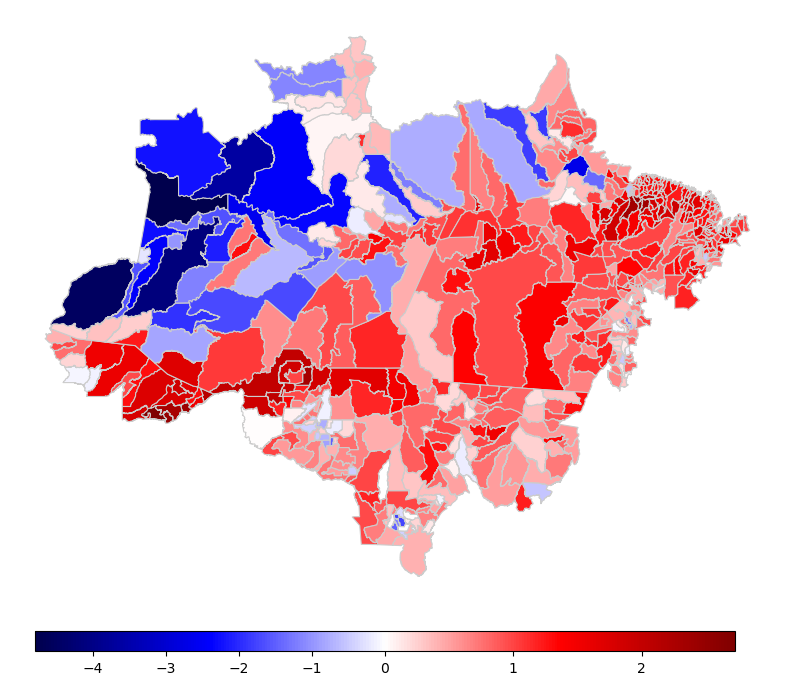

In [78]:

amazonas = geobr.read_municipality(year=2020)

municipality_codes = Amazon_Rainforest[2][:558]

data = pd.DataFrame({'code_muni': municipality_codes, 'phi_mean': phi_mean})


amazonas = amazonas.merge(data, on='code_muni', how='left')


fig, ax = plt.subplots(1, 1, figsize=(10, 10))

amazonas.plot(column='phi_mean', 
              cmap='seismic',  
              linewidth=0.8, 
              ax=ax, 
              edgecolor='0.8',
              legend=False)

ax.set_xticks([])
ax.set_yticks([])

cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.02])  # Position of colorbar
sm = plt.cm.ScalarMappable(cmap='seismic', norm=mcolors.TwoSlopeNorm(vmin=phi_mean.min(), vcenter=0, vmax=phi_mean.max()))
sm.set_array([]) 
fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')

plt.savefig('Plots/phi_big.eps', format='eps')
ax.axis('off')
plt.show()

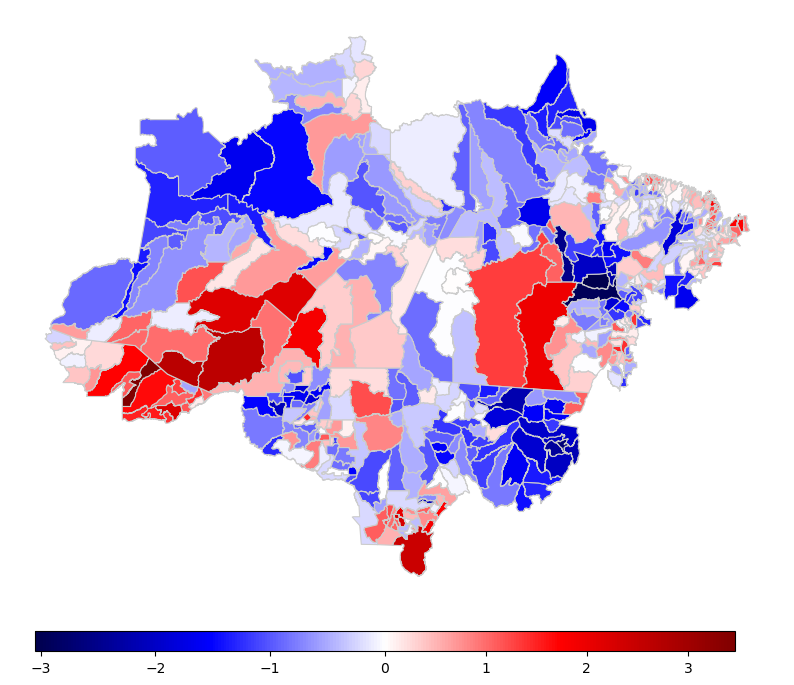

In [79]:

amazonas = geobr.read_municipality(year=2020)

municipality_codes = Amazon_Rainforest[2][:558]

data = pd.DataFrame({'code_muni': municipality_codes, 'delta_mean': delta_mean})


amazonas = amazonas.merge(data, on='code_muni', how='left')


fig, ax = plt.subplots(1, 1, figsize=(10, 10))

amazonas.plot(column='delta_mean', 
              cmap='seismic',  
              linewidth=0.8, 
              ax=ax, 
              edgecolor='0.8',
              legend=False)

ax.set_xticks([])
ax.set_yticks([])

cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.02])  # Position of colorbar
sm = plt.cm.ScalarMappable(cmap='seismic', norm=mcolors.TwoSlopeNorm(vmin=delta_mean.min(), vcenter=0, vmax=delta_mean.max()))
sm.set_array([]) 
fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')

plt.savefig('Plots/delta_big.eps', format='eps')
ax.axis('off')
plt.show()